# Einführung zu Pandas
Pandas baut auf Numpy auf

Installation:
!pip install pandas

In [15]:
# Bibliotheken 
import numpy as np
import pandas as pd

In [16]:
# !!! datensätze einlesen werden unten erklärt, die Datensätze brauch 
# ich inline, da ich bestimmte Pandas Actions daran erkläre

# Diesen Datensatz brauch ich bei der Erklärung von replace Values
# cars
labelList=['symboling','normalizedLosses','make','fuelType','aspiration','numOfDoors','bodyStyle','driveWheels','engineLocation',
           'wheelBase','length','width','height','curbWeight','engineType','numOfCylinders','engineSize','fuelSystem','bore',
           'stroke','compressionRatio','horsepower','peakRpm','cityMpg','highwayMpg','price']
carDF = pd.read_csv('./data/data_car.csv',delimiter=',',encoding='utf-8', names=labelList)

# Advertisment
advertismentData=pd.read_csv('./data/islrData_advertising.csv',delimiter=',',encoding='utf-8')
advertismentData = advertismentData.drop(['Unnamed: 0'], axis=1)
#advertismentData.head()


#IrisDataSet
irisData = pd.read_csv('./data/iris.csv',delimiter=',',encoding='utf-8')
irisData.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
#irisData.head()

**Sequentielles einlesen**<br>
Es kann auch vorkommen, dass die Datasets in mehreren einzelnen CSV-Dateien vorliegen und diese nun sequentiell zu einem "Großen" Df eingelsen werden sollen => setzt logischerweise vorraus, dass alle CSV-Dateien zumindest von den Feature/ Spalten her identisch aufgebaut sind. Das Beispiel dient nur dem Einlesen.
[Link zu pfad](../Zeitreihen/Sample/Movement/dataset)

In [17]:
# teil des File-namens, alles weitere kommt über die ID und wir iterieren mit einem For Count
path = '../Zeitreihen/Sample/Movement/dataset/MovementAAL_RSS_'
sequences = list() # = []
print(sequences)
for i in range(1,315):# Sequentielles Einlesen von Dataframes
    file_path = path + str(i) + '.csv'
    #print(file_path)
    df = pd.read_csv(file_path, header=0)
    values = df.values
    sequences.append(values)
    
targets = pd.read_csv('../Zeitreihen/Sample/Movement/dataset/MovementAAL_target.csv')
targets = targets.values[:,1]
targets.shape
print(len(sequences))
print(type(sequences))
print(sequences[0][0]) # => mehrdimensionale Liste


[]
314
<class 'list'>
[-0.90476 -0.48     0.28571  0.3    ]


## Serien
~ ähnlich einer Numpy Array = Nmpy Array kann keien Achsenbeschriftung haben => Mit Pandas kann man mit Labels arbeiten

Der erste Hauptdatentyp den wir uns für Pandas anschauen ist der der Series. Lass uns Pandas importieren und einige Series Objekte untersuchen.

Eine Series (dt. Serie) ist sehr ähnlich zu einem NumPy Array. Tatsächlich ist es auf dem NumPy Array Objekt aufgebaut. Was das NumPy Array letztlich von einer Series unterscheidet ist, dass Series Achsenbeschriftungen haben kann. Das bedeutet wir können nicht nur über numerische Indizes, sondern auch über das Label indexieren. Außerdem muss eine Series nicht unbedingt numerische Werte beinhalten.

Schauen wir uns das Konzept an einigen Beispielen an:

### Erstellen einer Pandas Serie

In [18]:
# Basis liste für Pandas
labels = ["a","b","c"]
meine_liste = [10,20,30]
# numpy Array
arr = np.array([10,20,30]) #<= hieraus erstellen wir ein Pandas DF
d = {"a":10,"b":20,"c":30} #<= hieraus erstellen wir ein Pandas DF

#### Aus einer pythonListe

In [19]:
pd.Series(data=meine_liste)
pd.Series(data=meine_liste,index=labels) #<= erstellt labels

a    10
b    20
c    30
dtype: int64

#### Aus einer numpy-Array

In [20]:
pd.Series(arr, labels)

a    10
b    20
c    30
dtype: int32

#### Aus einem Dictionary

In [21]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

### Inhalte von einem Pandas series
kann numerisch und strings oder auch eine Funktion sein

#### Inhalt String

In [22]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

#### Inhalt Funktionen

In [23]:
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

### Indexe Nutzen innerhalb von Pandas-Series
Der Schlüssel zur Nutzung von Series ist das Verständnis für deren Index. Pandas nutzt diese Indexnamen oder -nummern, um schnelle Suchen durchzuführen. Dies funktioniert ähnlich einer Hash-Tabelle oder einem Dictionary.

#### Create Series mit Index

In [24]:
# Serie1
ser1 = pd.Series([1,2,3,4],index=["USA","Deutschland","Russland","Japan"])
ser1

USA            1
Deutschland    2
Russland       3
Japan          4
dtype: int64

In [25]:
# Serie2, hier sind schon bekannte indexe drin, 1,2,&4 // dafür ist russland raus, aber Italien rein
ser2 = pd.Series([1,2,5,4],index=["USA","Deutschland","Italien","Japan"])
ser2

USA            1
Deutschland    2
Italien        5
Japan          4
dtype: int64

#### Abfragen des Series anhand des Index

In [26]:
ser1['Russland'] #<= returnt den wert, indiesem fall etwas numerisches

3

In [27]:
#### Addition von Series

In [28]:
ser1 + ser2 # D = 2+2 usw // italien i ist nur einmal drin => nan

Deutschland    4.0
Italien        NaN
Japan          8.0
Russland       NaN
USA            2.0
dtype: float64

## Data-Frame 
Data Frames sind das Steckenpferd von Pandas und wurden direkt durch die Programmiersprache R inspiriert. Wir können uns Data Frames als eine Vielzahl von Series vorstellen, die zusammengefügt wurden, um sich den selben Index zu teilen.

In [29]:
from numpy.random import randn
np.random.seed(101)

### Erstellen eines Dataframes

einlesen von externen Infos unter dem Kapitel "Daten Input und Output" in diesem Notebook

#### Aus einer mehrdimensionalen Pythonliste 

In [30]:
OwnData = [['tom', 10], ['nick', 15], ['juli', 14]] 
OwnDF = pd.DataFrame(OwnData) # DF für die Transofmationen des DF
OwnDF.columns = ['Name', 'Age']
print(OwnDF)

   Name  Age
0   tom   10
1  nick   15
2  juli   14


In [31]:
import pandas as pd
newData = [['Label1', 'Label2', 'Label3'], 
           [1,2,3], 
           [4,5,6], 
           [7,8,9]
          ]
OwnDF = pd.DataFrame(newData)
print(OwnDF)
print()
print()
print()

## First Row = Col-Names
colNames = newData[0]
colValues = newData[1:]

OwnDF2 = pd.DataFrame(columns=colNames, data = colValues)
print(OwnDF2)

        0       1       2
0  Label1  Label2  Label3
1       1       2       3
2       4       5       6
3       7       8       9



   Label1  Label2  Label3
0       1       2       3
1       4       5       6
2       7       8       9


#### aus random

In [32]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())# <0 hier wird mit dem Split gearbeitet
names='W X Y Z'.split()
index='A B C D E'.split()
print(names, index)
print(df)
df['W']

['W', 'X', 'Y', 'Z'] ['A', 'B', 'C', 'D', 'E']
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509


A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [33]:
names='W X Y Z'.split()
index='A B C D E'.split()

### Transponiere Dataframe

In [34]:
df_t = df.T
print(df)
print(df_t)

          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509
          A         B         C         D         E
W  2.706850  0.651118 -2.018168  0.188695  0.190794
X  0.628133 -0.319318  0.740122 -0.758872  1.978757
Y  0.907969 -0.848077  0.528813 -0.933237  2.605967
Z  0.503826  0.605965 -0.589001  0.955057  0.683509


### Spalten Auswahl und Indexierung

In [35]:
# Einzelne Spalte auswählen
df["W"] #<= die einzelne Spalte ist eine Seris

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [36]:
# Eine Liste von Spaltennamen übergeben
df[["W","Z"]]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


#### Spalten zurückgeben mit iloc

In [53]:
# 1te Spalte
y = df.iloc[:, 0]
print(y)

# Range an Spalten zurückgeben
y = df.iloc[:, 1:4]
print(y)

# Range an Spalten zurückgeben
y = y.iloc[:, [True, False, True]]
print(y)

# Lambda Function
y = df.iloc[:, lambda df: [0, 2]]
print(y)

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64
          X         Y         Z
A  0.628133  0.907969  0.503826
B -0.319318 -0.848077  0.605965
C  0.740122  0.528813 -0.589001
D -0.758872 -0.933237  0.955057
E  1.978757  2.605967  0.683509
          X         Z
A  0.628133  0.503826
B -0.319318  0.605965
C  0.740122 -0.589001
D -0.758872  0.955057
E  1.978757  0.683509
          W         Y
A  2.706850  0.907969
B  0.651118 -0.848077
C -2.018168  0.528813
D  0.188695 -0.933237
E  0.190794  2.605967


### Spalte hinzufügen

#### Aus einer Rechnung der internen Series/Spalten

In [42]:
df["neu"] = df["W"] + df["Y"]
print(df)
df["neu1"] = 5
print(df)
df["neu2"] = df["W"] + 5
print(df)
df["neu3"] = "Hallo"
df

names = ['Smith', 'Mayer', 'Christ', "Mueller", "Baum"]
df["neu4"] = names
print(df)

          W         X         Y         Z       neu  neu1      neu2   neu3  \
A  2.706850  0.628133  0.907969  0.503826  3.614819     5  7.706850  Hallo   
B  0.651118 -0.319318 -0.848077  0.605965 -0.196959     5  5.651118  Hallo   
C -2.018168  0.740122  0.528813 -0.589001 -1.489355     5  2.981832  Hallo   
D  0.188695 -0.758872 -0.933237  0.955057 -0.744542     5  5.188695  Hallo   
E  0.190794  1.978757  2.605967  0.683509  2.796762     5  5.190794  Hallo   

      neu4  
A    Smith  
B    Mayer  
C   Christ  
D  Mueller  
E     Baum  
          W         X         Y         Z       neu  neu1      neu2   neu3  \
A  2.706850  0.628133  0.907969  0.503826  3.614819     5  7.706850  Hallo   
B  0.651118 -0.319318 -0.848077  0.605965 -0.196959     5  5.651118  Hallo   
C -2.018168  0.740122  0.528813 -0.589001 -1.489355     5  2.981832  Hallo   
D  0.188695 -0.758872 -0.933237  0.955057 -0.744542     5  5.188695  Hallo   
E  0.190794  1.978757  2.605967  0.683509  2.796762     5  5.19

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64
          X         Y         Z
A  0.628133  0.907969  0.503826
B -0.319318 -0.848077  0.605965
C  0.740122  0.528813 -0.589001
D -0.758872 -0.933237  0.955057
E  1.978757  2.605967  0.683509
          X         Z
A  0.628133  0.503826
B -0.319318  0.605965
C  0.740122 -0.589001
D -0.758872  0.955057
E  1.978757  0.683509
          W         Y
A  2.706850  0.907969
B  0.651118 -0.848077
C -2.018168  0.528813
D  0.188695 -0.933237
E  0.190794  2.605967


### Spalten entfernen

In [23]:
df.drop('neu', axis=1) # <= zeigt das nur, das muss noch zugewiesen werden
print(df)
df = df.drop('neu', axis=1)# <= ist das gleiche wie df.drop('neu',axis=1,inplace=True)
df

          W         X         Y         Z       neu  neu1      neu2   neu3  \
A  2.706850  0.628133  0.907969  0.503826  3.614819     5  7.706850  Hallo   
B  0.651118 -0.319318 -0.848077  0.605965 -0.196959     5  5.651118  Hallo   
C -2.018168  0.740122  0.528813 -0.589001 -1.489355     5  2.981832  Hallo   
D  0.188695 -0.758872 -0.933237  0.955057 -0.744542     5  5.188695  Hallo   
E  0.190794  1.978757  2.605967  0.683509  2.796762     5  5.190794  Hallo   

      neu4  
A    Smith  
B    Mayer  
C   Christ  
D  Mueller  
E     Baum  


,W,X,Y,Z,neu1,neu2,neu3,neu4
A,2.706850,0.628133,0.907969,0.503826,5,7.706850,Hallo,Smith
B,0.651118,-0.319318,-0.848077,0.605965,5,5.651118,Hallo,Mayer
C,-2.018168,0.740122,0.528813,-0.589001,5,2.981832,Hallo,Christ
D,0.188695,-0.758872,-0.933237,0.955057,5,5.188695,Hallo,Mueller
E,0.190794,1.978757,2.605967,0.683509,5,5.190794,Hallo,Baum


In [24]:
df = df.drop(['neu1', 'neu2', 'neu3', 'neu4'], axis=1)# <= ist das gleiche wie df.drop('neu',axis=1,inplace=True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


### Zeilen entfernen

In [25]:
df.drop('E',axis=0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


### Zeilen Auswahl und Indexierung

#### Mehtode mit Loc
hier wird der string für spalten / Zeilenname verwendet

In [26]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

#### Mehtode mit iLoc indexLoc
hier wird der Index verwendet

In [27]:
df.iloc[0] # <= index loc

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

### Subsets von Dataframe

#### Einzelner wert via LOC

In [28]:
# Zeile & Spalten Sprich values
df.loc['B','Y']

-0.8480769834036315

#### SubFrame via LOC

In [29]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


#### Bedingte Auswahl // Filter auf ganzes Dataframe

In [30]:
df > 0 #<= hier wird für jeden Wert eine Bedingung geprüft und entsprechend ausgegeben

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [31]:
df[df['W']>0]['Y'] #<= bedingung und dann nur eine Bestimme Spalte || Spalte C fehlt da w da NAN

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [32]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [33]:
df[(df['W']>0) & (df['Y'] > 1)] 
# zwei Bedingungen => hier die logischen Operatoren von Python checken...das ist nicht and oder OR sondern & oder |

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


In [34]:
## Anderes Beispiel mit dem Advertisment dataset
# hier alle größer als bestimmter wert in TV
advertismentDataLoc = advertismentData.loc[
    (advertismentData.TV > 40)]
print(advertismentData.shape)
print(advertismentDataLoc.shape)

# hier alle größer als bestimmter wert in TV UND größer in Radio
advertismentDataLoc2 = advertismentData.loc[
    (advertismentData.TV > 40) & (advertismentData.radio > 40)]
print(advertismentData.shape)
print(advertismentDataLoc2.shape)

# Top whatever
advertismentDataLoc3 = advertismentData.loc[:99]
print(advertismentData.shape)
print(advertismentDataLoc3.shape)

(200, 4)
(169, 4)
(200, 4)
(30, 4)
(200, 4)
(100, 4)


In [35]:
### Top werte top10 top 100 top whatever
advertismentDataLoc3 = advertismentData.loc[:99]
print(advertismentData.shape)
print(advertismentDataLoc3.shape)

(200, 4)
(100, 4)


#### Filter for categorical Value / Filter for String Value // zeilenweise filtern

In [36]:
filteredforCarBrand  = carDF.loc[carDF['make'] == 'alfa-romero']
print(carDF.shape)
print(filteredforCarBrand.shape)

(205, 26)
(3, 26)


In [37]:
## anderes Beispiel
sal = pd.read_csv("./data/Salaries.csv")
sal.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [38]:
# Suchen nach bestimmten Namen und anschließen ein anderer Wert
#Wie lautet die Berufsbezeichnung (en. JobTitle) von JOSEPH DRISCOLL?
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']
# oder
name  = sal.loc[sal['EmployeeName'] == 'JOSEPH DRISCOLL']
name.JobTitle

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [39]:
# **Wie viel verdient JOSEPH DRISCOLL (inkl. Zusatleistungen (en. Benefits))?**
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits']
# = name.TotalPayBenefits

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [40]:
# Wie heißt die höchstbezahlte Person (inkl. Zusatzleistungen)?
sal[sal['TotalPayBenefits']== sal['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [41]:
# **Wie viel verdient JOSEPH DRISCOLL (inkl. Zusatleistungen (en. Benefits))?**
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [42]:
# **Wie lautet der Name der am niedrigsten bezahlten Person? Fällt dir etwas merkwürdiges an ihrem Lohn auf?** 
# Ansatz mit sortiertem DF
salDfSorted = sal.sort_values(by='TotalPayBenefits', ascending=[True])
print(salDfSorted.iloc[0,].EmployeeName)
print(salDfSorted.iloc[0,].TotalPayBenefits)

Joe Lopez
-618.13


#### Vorsortiere des Dataframe und zugehörige Aggregationen

In [43]:
# **Wie ist der durchschnittliche (en. mean) Grundlohn (en. base pay) von allen Angestellten pro Jahr (2011-2014)?**
sal.groupby("Year").mean()["BasePay"]

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [44]:
## Absolut Werte pro Jahr
sal['Year'].value_counts()

2014    38123
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

In [45]:
# **Was sind die 5 häufigsten Jobs?**
sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [46]:
# **Wie viele Berufsbezeichnungen (en. job titles) wurden 2013 von nur einer Person getragen?**
sum(sal[sal['Year']==2013]['JobTitle'].value_counts() == 1)

202

In [47]:
# **Wie viele Angestellte tragen ein "Chief" in ihrer Berufsbezeichnung?**
def chief_string(title):
    if 'chief' in title.lower().split():
        return True
    else:
        return False
sum(sal['JobTitle'].apply(lambda x: chief_string(x)))

477

In [48]:
# Weiteres Bsp mit doppelter Sortierung & Downfilter
ecom = pd.read_csv('./data/Ecommerce Purchases')

In [49]:
# **Wie viele Leute haben als Kreditkartenanbieter (en. credit card provider) *American Express* 
# UND haben einen Einkauf über $95 getätigt?**
ecom[(ecom['CC Provider']=='American Express') & (ecom['Purchase Price']>95)].count()

Address             39
Lot                 39
AM or PM            39
Browser Info        39
Company             39
Credit Card         39
CC Exp Date         39
CC Security Code    39
CC Provider         39
Email               39
Job                 39
IP Address          39
Language            39
Purchase Price      39
dtype: int64

In [50]:
# einbau einer Lambda-Funktion in den Filter
# **Die Kreditkarte wie vieler Kunden läuft im Jahr 2025 ab?**
sum(ecom['CC Exp Date'].apply(lambda x: x[3:]) == '25')

1033

In [51]:
# anderes Bsp-Lambda-Fkt:
# **Was sind die populärsten Email-Anbieter (z.B. gmail.com)?**
ecom['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(5)

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

#### Reshaping
hier wollen ein unter Subset-Bilden. Ziel ist es aus einem Datensatz mit n feature einen neuen datensatz mit n-"WelcheAnzahlAuchImmer" zu bilden. Anders ausgedrückt, wir wollen nur bestimmte SPALTEN herauspicken. 

Wollen wir nur bestimmte ZEILEN auswählen, so muss man einen Filter/Subset wählen.

#### Sample Sub-Sample
Wenn ein DF gegeben ist und wir nun ein Subframe von den Daten haben wollen. Bsp weil wir auf dem Subsample die Daten trainieren wollen....
Klassisch bei Regressionsfragestellungen

In [52]:
x_data = np.linspace(0.0,10.0,1000000)
y_true =  (0.5 * x_data ) + 5
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)
print(my_data.shape)
my_data = my_data.sample(n=250)
print(my_data.shape)

(1000000, 2)
(250, 2)


##### Version1 dropping obsolet data

In [53]:
dfTv = advertismentData.drop(['TV','radio','newspaper'], axis=1)
print(dfTv.shape) # => es ist wichtig dass hier (200,1) und nicht (200, ) steht

(200, 1)


##### Version 2  Transform into NP & reshaping the format

###### Long Version

In [54]:
dfTv = advertismentData['TV']
print(dfTv.shape) # => hier eben das Problem das oben bereit erwähnt wurde => (200, ) 
dfTv = dfTv.values.reshape(-1,1)
print(dfTv.shape) # => hier eben das Problem das oben bereit erwähnt wurde => (200, ) 

(200,)
(200, 1)


###### Short Version
####### Single-Select

In [55]:
dfTv = advertismentData['TV'].values.reshape(-1,1)
print(dfTv.shape)

(200, 1)


####### Multi-Select

In [56]:
dfTvRadio = advertismentData[['TV', 'radio']].values.reshape(-1,2)
dfTvRadio2 = pd.DataFrame(dfTvRadio, columns = ['TV', 'Radio']) 
print(dfTvRadio.shape)
print(dfTvRadio2.shape)

(200, 2)
(200, 2)


In [57]:
carDF.head(2)

,symboling,normalizedLosses,make,fuelType,aspiration,numOfDoors,bodyStyle,driveWheels,engineLocation,wheelBase,...,engineSize,fuelSystem,bore,stroke,compressionRatio,horsepower,peakRpm,cityMpg,highwayMpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


### Indexierung extended / Mehr Index

#### Index zurücksetzten in den Numerischen Wert
hier werden die Alten indexe in eine Spalte übernommen

In [58]:
df.reset_index() # fehlt die Zuweisung

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


#### zuweisen neuen Index

In [59]:
neuind = 'BY BW HH BB NW'.split()
df["Staaten"] = neuind
print(df)
df= df.set_index('Staaten')
df

          W         X         Y         Z Staaten
A  2.706850  0.628133  0.907969  0.503826      BY
B  0.651118 -0.319318 -0.848077  0.605965      BW
C -2.018168  0.740122  0.528813 -0.589001      HH
D  0.188695 -0.758872 -0.933237  0.955057      BB
E  0.190794  1.978757  2.605967  0.683509      NW


,W,X,Y,Z
Staaten,,,,
BY,2.706850,0.628133,0.907969,0.503826
BW,0.651118,-0.319318,-0.848077,0.605965
HH,-2.018168,0.740122,0.528813,-0.589001
BB,0.188695,-0.758872,-0.933237,0.955057
NW,0.190794,1.978757,2.605967,0.683509


### Multi-Index und Index Hierarchie
hier wird ein Aussen und ein Innen Index verwendet

#### Erstelle Multi-Index

In [60]:
aussen = ['G1', 'G1', 'G1', 'G2', 'G2', 'G2']
innen = [1,2,3,1,2,3]
hier_index = list(zip(aussen,innen)) # hier = heirarchich
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [61]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

A         B
G1 1  0.663267 -0.892191
   2  0.291270 -0.043024
   3 -0.318528  0.056316
G2 1 -0.516192  0.859812
   2  0.145238 -0.019217
   3 -1.868013  0.494686

In [62]:
#Diesen Multiindex kann man jetzt nach bestimmtne Kriterien Downfiltern
df.loc['G1'] #<= nur nach g1 gefiltert
#df.loc[2] #<= nur nach g1 gefiltert
df.loc['G1'].loc[2] #<= nur nach g1 gefiltert & g2 gefiltert

A    0.291270
B   -0.043024
Name: 2, dtype: float64

#### Weise Namen an Multiindex zu

In [63]:
df.index.names

FrozenList([None, None])

In [64]:
df.index.names = ['Gruppe','Num']
df

A         B
Gruppe Num                    
G1     1    0.663267 -0.892191
       2    0.291270 -0.043024
       3   -0.318528  0.056316
G2     1   -0.516192  0.859812
       2    0.145238 -0.019217
       3   -1.868013  0.494686

#### Abfragen von Multiindex

In [65]:
# Filtern nach dem ersten Index
df.xs('G1') # <= ähnlich wie 

,A,B
Num,,
1,0.663267,-0.892191
2,0.291270,-0.043024
3,-0.318528,0.056316


In [66]:
# Filtern nach dem zweiten Index
df.xs(1,level='Num')

,A,B
Gruppe,,
G1,0.663267,-0.892191
G2,-0.516192,0.859812


In [67]:
df.xs(['G1',1])

A    0.663267
B   -0.892191
Name: (G1, 1), dtype: float64

## Fehlende Daten/Missing Data
Dieses Problem der fehlenden Daten tritt relativ häufig auf:

unvollständige Datensätze aufgrund technischer Pannen oder eines Datenverlustes
wenn einige befragte Personen aufgrund mangelnden Wissens oder unzureichender Antwortmotivation auf bestimmte Fragen bewusst keine Antwort geben
Nun werden wir einige der üblichen Wege (z.B. Eliminierungsverfahren und Imputation) kennenlernen, um mit Missing Data (dt. fehlenden Daten) umzugehen.

In [68]:
# BasicData
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


### Eliminierung
Hat einen Großen Informationsverlust.

Das Eliminierungsverfahren (auch: Complete-case analysis) zählt zu den gängigen Missing-Data-Techniken. Dabei werden sämtliche Datensätze, bei denen eines oder mehrere Erhebungsmerkmale fehlende Werte aufweisen, aus der Datenmatrix gestrichen. Dieses Verfahren ist zwar sehr einfach, hat aber erhebliche Nachteile: 
1. Insbesondere hat es einen erheblichen Informationsverlust zur Folge.
1. Ferner kann diese Technik zu einer Verfälschung der verbleibenden Stichprobe führen. Als häufiges Beispiel gelten Umfragen bezüglich des Einkommens, bei denen es durchaus vorkommen kann, dass gerade Personen mit einem relativ hohen Einkommen dieses ungerne angeben und es daher in solchen Fällen tendenziell zu Missing Data kommt. 

In [69]:
df.dropna()# <= nur noch die Zeilen die kein Nullwerte haben

,A,B,C
0,1.0,5.0,1


In [70]:
df.dropna(axis=1) #<= nur noch die Spaltend die keine Nullwerte haben

,C
0,1
1,2
2,3


In [71]:
df.dropna(thresh=2) #<= threshold ab einer gewissen Anzahl von leeren werten

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


### Imputation
Kann Verfälschungen haben

Um dieses Problem der Eliminierungsverfahren möglichst in den Griff zu bekommen, wurden Imputationsverfahren entwickelt, bei denen versucht wird, fehlende Daten nicht einfach zu ignorieren, sondern stattdessen durch plausible Werte zu ersetzen, die unter anderem mit Hilfe der beobachteten Werte des gleichen Datensatzes geschätzt werden können.

In [72]:
# finde die Nullvalues
df.isnull()

,A,B,C
0,False,False,False
1,False,True,False
2,True,True,False


#### Konstante

In [73]:
df.fillna(value='Füllwert') #<= Konstatnte
df.fillna(value=0)

,A,B,C
0,1.0,5.0,1
1,2.0,0.0,2
2,0.0,0.0,3


#### Mean

In [74]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

## Gruppieren / GroupBy
Die `groupby` Methode (dt. gruppieren nach) erlaubt es uns Zeilen zu gruppieren und Aggregationsfunktionen aufzurufen.
![bild](./imgs/Groupby.PNG)

In [75]:
# Data Frame erstellen
data = {'Firma':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df = pd.DataFrame(data)
df

,Firma,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


### Simple Gruppieren

In [76]:
# Groupby Firma
df.groupby('Firma') #<0 kann noch nicht wirklich genutzt werden, aber hier kann die aggreaftion ausgewählt werdne
df.groupby('Firma').mean()

,Sales
Firma,
FB,296.5
GOOG,160.0
MSFT,232.0


In [77]:
## Mit variablen
nach_firma = df.groupby('Firma')
nach_firma.mean()

,Sales
Firma,
FB,296.5
GOOG,160.0
MSFT,232.0


In [78]:
df

,Firma,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [79]:
## ggf counts // im Falle ein Sub-Df und dann dort bestimmte werte zählen
df['Firma'].value_counts()


GOOG    2
MSFT    2
FB      2
Name: Firma, dtype: int64

### Gruppieren mit Mathematischen Funktionen

In [80]:
### Funktionen
# Standardabweichung
nach_firma.std()
# min
nach_firma.min()
# max
nach_firma.max()
# absolut
nach_firma.count()
# Zusammenfassung
nach_firma.describe()

Sales                                                        
      count   mean         std    min     25%    50%     75%    max
Firma                                                              
FB      2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG    2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT    2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

hier noch die Darstellung Transponiert

## Zusammenfügen und Verknüpfen || Merge, Join & Concatenation
Es gibt im Wesentlichen drei Wege, um Data Frames zusammenzuführen: Merging, Joining und Concatenating (Verknüpfen). In dieser Lektion werden wir diese drei Methoden anhand von Beispielen durchgehen.

### Append 
Möglichkeit 2 Dataframe aneinander zu hängen, ähnlichwie "Concat axis = 0"

In [81]:
# Data for append
# erstellen der zwei dataframes
dataA = [['tom', 10], ['nick', 15], ['juli', 14]] 
dataB = [['Jochen', 117], ['Chris', 71], ['Silvia', 5]] 
dfA = pd.DataFrame(dataA, columns = ['Name', 'Age'])
dfB = pd.DataFrame(dataB, columns = ['Name', 'Age'])

In [82]:
#Inteaktion des Dataframes
dfappend = dfA.append(dfB)
print(dfappend)
print("###################")
#update index for new dataframe
dfappend = dfappend.reset_index()
# Drop old index column
dfappend = dfappend.drop(columns="index")
print(dfappend)

     Name  Age
0     tom   10
1    nick   15
2    juli   14
0  Jochen  117
1   Chris   71
2  Silvia    5
###################
     Name  Age
0     tom   10
1    nick   15
2    juli   14
3  Jochen  117
4   Chris   71
5  Silvia    5


### Concat
*Concatenating* bezeichnet das aneinanderreihen von Data Frames. Dabei sollte man beachten, dass die Dimensionen entlang der Achse, entlang derer man anreiht, übereinstimmen.

Dann kann man `pd.concat` nutzen und eine Liste von Data Frames übergeben:

In [83]:
### Data für die Demonstration
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])
print(df1)
print('###########')
print(df2)
print('###########')
print(df3)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
###########
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
###########
      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


#### Zeilen aneinander reihen

In [84]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


#### Spalten zusammenführen

In [85]:
pd.concat([df1,df2,df3],axis=1) #<= gibt so keinen Sinn, concat gibt mehr sinn bei Zeilen zusammenhängen

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


### Merge

Vergleiche SQL-Abfragen in dem Kontext

#### inner Join

##### InnerJoin mit einem Key

In [86]:
# BSP data für Merge
links = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
rechts = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    
print(links)  
print('###########')
print(rechts)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
###########
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [87]:
pd.merge(links,rechts,how='inner',on='key') #<= hier inner /leftouter

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


##### Inner Join mit zwei Keys

In [88]:
links = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
rechts = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

print(links)  
print('###########')
print(rechts) #

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
###########
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


In [89]:
pd.merge(links, rechts, on=['key1', 'key2']) # <= hier wird mit zwei key gejoint

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


#### Outer Join 

In [90]:
# mit zwei Keys
pd.merge(links, rechts, how="outer", on=['key1', 'key2']) # <= empties werden mit NAN aufgeüllte

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


#### Right Join 

In [91]:
pd.merge(links, rechts, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


#### Left Join 

In [92]:
pd.merge(links, rechts, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


### Join
*Joining* ist eine übliche Methode, um Spalten mit zwei potentiell unterschiedlichen indizierten Data Frames in einen gemeinsamen Data Frame zu packen.

In [93]:
links = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

rechts = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])


print(links)  
print('###########')
print(rechts) #

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
###########
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


#### Inner Join

In [94]:
# Wir fügen an das linke DF das Rechte an
links.join(rechts)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


#### Outer Join

In [95]:
links.join(rechts, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## Operationen

In [96]:
df = pd.DataFrame({'spa1':[1,2,3,4],'spa2':[444,555,666,444],'spa3':['abc','def','ghi','xyz']})
df.head()

,spa1,spa2,spa3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### head / tail
nur die ersten x Zeilen Ausgeben 

In [97]:
df = pd.DataFrame({'spa1':[1,2,3,4],'spa2':[444,555,666,444],'spa3':['abc','def','ghi','xyz']})
df.head()
df.tail()

,spa1,spa2,spa3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### info

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spa1    4 non-null      int64 
 1   spa2    4 non-null      int64 
 2   spa3    4 non-null      object
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


### unique value
gebe jede Ausprägung nur einmal aus

In [99]:
df['spa2'].unique()

array([444, 555, 666], dtype=int64)

In [100]:
# number de runiquen value
df['spa2'].nunique()

3

### Count 
gibt die Anzahl der uniquen Werte zurück <= nichts anders als Groupby & Aggregation

In [101]:
df['spa2'].value_counts()

444    2
555    1
666    1
Name: spa2, dtype: int64

### Apply
Via apply wird dann auch die Lambda-Funktion eingebaut. Der Unterschied hier ist dass die Funktion erst definiert und dann angewendet wird. Bei einer Lambda-Funktion wird die Funktion definiert, während sie bereits aufgerufen wird.

#### eigene Funktion

In [102]:
def mal2(x):
    return x*2
df['spa1'].apply(mal2)

0    2
1    4
2    6
3    8
Name: spa1, dtype: int64

#### Builtin Function

In [103]:
df['spa3'].apply(len)

0    3
1    3
2    3
3    3
Name: spa3, dtype: int64

#### Lambda Function-Num

In [104]:
df['spa2'].apply(lambda x: x+2)

0    446
1    557
2    668
3    446
Name: spa2, dtype: int64

#### Lambda Function-Cat mit Split

In [105]:
df['names'] = ['iris Smith', 'Eva Mayer', 'Anna Christ', 'Nadine Mueller']
df['vorname'] = df['names'].apply(lambda title: title.split(' ')[0])
df['nachname'] = df['names'].apply(lambda title: title.split(' ')[1])
df

,spa1,spa2,spa3,names,vorname,nachname
0,1,444,abc,iris Smith,iris,Smith
1,2,555,def,Eva Mayer,Eva,Mayer
2,3,666,ghi,Anna Christ,Anna,Christ
3,4,444,xyz,Nadine Mueller,Nadine,Mueller


In [106]:
#df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

### Aggreagationen

In [107]:
df['spa1'].sum()

10

In [108]:
df['spa1'].max()

4

In [109]:
df['spa1'].min()

1

In [110]:
df['spa1'].var()

1.6666666666666667

In [111]:
df['spa1'].std()

1.2909944487358056

### SpaltenZeilen name zurückgegebn name, Column name

In [112]:
df.columns
type(df.columns)
df.columns[0]
columnList = df.columns
columnList

Index(['spa1', 'spa2', 'spa3', 'names', 'vorname', 'nachname'], dtype='object')

In [114]:
df.index

RangeIndex(start=0, stop=4, step=1)

### Sortieren

#### nach einem Wert

In [115]:
df.sort_values(by='spa2') #inplace=False per Standard

,spa1,spa2,spa3,names,vorname,nachname
0,1,444,abc,iris Smith,iris,Smith
3,4,444,xyz,Nadine Mueller,Nadine,Mueller
1,2,555,def,Eva Mayer,Eva,Mayer
2,3,666,ghi,Anna Christ,Anna,Christ


#### nach meherern Feature

In [116]:
print(irisData.head(5))
dfSortedSpecies = irisData.sort_values(['SepalWidthCm', 'Species' ], ascending=[True, True])
print(dfSortedSpecies.head(5))
dfSortedSpecies = irisData.sort_values(['SepalWidthCm', 'Species' ], ascending=[True, False])
print(dfSortedSpecies.head(5))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0            5.1           3.5            1.4           0.2  Setosa
1            4.9           3.0            1.4           0.2  Setosa
2            4.7           3.2            1.3           0.2  Setosa
3            4.6           3.1            1.5           0.2  Setosa
4            5.0           3.6            1.4           0.2  Setosa
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
60             5.0           2.0            3.5           1.0  Versicolor
62             6.0           2.2            4.0           1.0  Versicolor
68             6.2           2.2            4.5           1.5  Versicolor
119            6.0           2.2            5.0           1.5   Virginica
41             4.5           2.3            1.3           0.3      Setosa
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
60             5.0           2.0            3.5           1.0  Versicolor


### Na -Werte Finden

In [117]:
df.isna()
df.isna().any()
df.isna().any().any()

False

### Null Werte finden

In [118]:
df.isnull()

,spa1,spa2,spa3,names,vorname,nachname
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False


### Werte ersetzen / replace
#### Single Column

In [119]:
carDF['bore'] = carDF['bore'].replace("?", np.nan)
print(type(carDF))

<class 'pandas.core.frame.DataFrame'>


#### GesamtDatensatz

In [120]:
import numpy as np
carDF = carDF.replace("?", np.nan)
print(type(carDF))

<class 'pandas.core.frame.DataFrame'>


### Change Datatype von Spalte

#### mit astype

In [121]:
carDF[['price']]=carDF[['price']].astype('float64')

### Pivotieren

In [122]:
# Data for Pivot
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

df = pd.DataFrame(data)
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [123]:
df.pivot_table(values='D',index=['A', 'B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

In [124]:
### anderes Beispiel für das Pivotieren:
import seaborn as sns
fluege = sns.load_dataset('flights')
print(fluege.head())
fluege.pivot_table(values='passengers',index='month',columns='year')

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


<a name="PandasDummyencoder"></a>
### Pandas Dummy Encoding
Am Beispiel der Titanic Datasets feature sex Male /Femal  && embarked

In [125]:
titanic = pd.read_csv('./data/titanic_train.csv')
print(titanic.columns)
print(titanic.head(3))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [126]:
# Version in einer Spalte in Pandas
pd.get_dummies(titanic['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [136]:
pd.get_dummies(titanic['Embarked'])
pd.get_dummies(titanic['Embarked'], drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [137]:
print(titanic.Sex)

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


## Daten Input und Output

### Csv
Comma Seperated Vector / Value

In [138]:
# Input
df = pd.read_csv('./data/example.csv')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [139]:
# Input
advertismentData=pd.read_csv('./data/islrData_advertising.csv',delimiter=',',encoding='utf-8')
advertismentData = advertismentData.drop(['Unnamed: 0'], axis=1)
#advertismentData.head()

In [140]:
# Input
labelList=['symboling','normalizedLosses','make','fuelType','aspiration','numOfDoors','bodyStyle','driveWheels','engineLocation',
           'wheelBase','length','width','height','curbWeight','engineType','numOfCylinders','engineSize','fuelSystem','bore',
           'stroke','compressionRatio','horsepower','peakRpm','cityMpg','highwayMpg','price']
carDF = pd.read_csv('./data/data_car.csv',delimiter=',',encoding='utf-8', names=labelList)

In [141]:
# Output => schreiben in eine CSV Datei
df.to_csv('./data/my_example.csv',index=False)

### Excel
Pandas kann Excel-Dateien lesen und schreiben. Beachtet aber, dass dabei nur Daten importiert werden. Formeln und Bilder sind dabei nicht eingeschlossen. Makros oder Bilder in der Datei zu haben kann die `read_excel` Methode zum Abstürzen bringen.

In [142]:
# Input
#!pip install xlrd 
pd.read_excel('./data/Excel_Sample.xlsx',sheet_name='Sheet1')

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [143]:
# Output
# !pip install openpyxl
df.to_excel('./data/Excel_SampleOut.xlsx',sheet_name='Sheet1')

ModuleNotFoundError: No module named 'openpyxl'

### Html
wir extrheiern die HTML Tabelel von "http://www.fdic.gov/bank/individual/failed/banklist.html" => heir erhalten wir die erste Liste

In [144]:
'''
!pip install lxml
!pip install html5lib
!pip install BeautifulSoup4
'''
df_html = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')
print(df_html)

ImportError: lxml not found, please install it

### Sql
es gibt zu der DB (MYsql / postgress / MSSQl usw) jeweils eine eigenen Connector. Hier nur im Schnellformat. 

In [ ]:
#!pip install sqlalchemy
from sqlalchemy import create_engine

In [ ]:
engine = create_engine('sqlite:///:memory:')
df.to_sql('data', engine)

In [ ]:
sql_df = pd.read_sql('data',con=engine)
sql_df

### JSON
ähnlich wie xml, nur muss man im Json erhehblich weniger Overhead schreiebn. // muss noch erweitert werden

In [ ]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [ ]:
# Heres an example of what a JSON (JavaScript Object Notation) looks like:
json_obj = """
{   "zoo_animal": "Lion",
    "food": ["Meat", "Veggies", "Honey"],
    "fur": "Golden",
    "clothes": null, 
    "diet": [{"zoo_animal": "Gazelle", "food":"grass", "fur": "Brown"}]
}
"""

In [ ]:
#Let import json module
import json
#Lets load json data
data = json.loads(json_obj)
#Show
print(data)
#WE can also convert back to JSON
json.dumps(data)
#We can simply open JSON data after loading with a DataFrame
dframe = DataFrame(data['diet'])
#Show
dframe

### YAML

In [ ]:
import yaml

dct = yaml.safe_load('''
name: John
age: 30
automobiles:
- brand: Honda
  type: Odyssey
  year: 2018
- brand: Toyota
  type: Sienna
  year: 2015
''')


In [ ]:
assert dct['name'] == 'John'
assert dct['age'] == 30
assert len(dct["automobiles"]) == 2
assert dct["automobiles"][0]["brand"] == "Honda"
assert dct["automobiles"][1]["year"] == 2015

In [ ]:
print(dct['age'])

#### New Yaml Example
im folgenden Junk erstelle ich eine Liste in YAML Format

In [3]:
import yaml

a = ['item 1','item 2','item 3','item 4']
print(yaml.dump(a, explicit_start=True, default_flow_style=False))

---
- item 1
- item 2
- item 3
- item 4



#### Einlesen von YAML dateien

In [8]:
import yaml

with open(r'./data/fruits.yaml') as file:
    fruits_list = yaml.load(file, Loader=yaml.FullLoader)
print(fruits_list)

{'apples': 20, 'mangoes': 2, 'bananas': 3, 'grapes': 100, 'pineapples': 1}


In [23]:
import yaml

with open(r'./data/categories.yaml') as file:
    fruits_list = yaml.load(file, Loader=yaml.FullLoader)
print(fruits_list)

{'sports': ['soccer', 'football', 'basketball', 'cricket', 'hockey', 'table tennis'], 'countries': ['Pakistan', 'USA', 'India', 'China', 'Germany', 'France', 'Spain']}


In [25]:
import yaml

with open(r'./data/Gattungen.yaml') as file:
    Gattungen_list = yaml.load(file, Loader=yaml.FullLoader)
print(Gattungen_list)

{'Einzeller': ['Amoebe'], 'SÃ¤ugetiere': {'Affen': ['Schimpansen', 'Gorilla'], 'Katzenartige': ['Loewe', 'Tiger', 'Panda']}, 'Fische': {'Knochenfischen': ['Dunkler Riesenzackenbarsch', {'Barrakuda': ['GrÃ¼ner Barrakuda', {'Pinker Barrakuda': ['Kleiner pinker Barrakuda', 'GroÃŸer pinker Barrakuda']}]}, 'Buntbarsch'], 'Knorbelfische': ['Rochen']}}


### APIs

#### Pandas DataReader
Funktionen aus pandas_datareader.data und pandas_datareader.wb extrahieren Daten aus verschiedenen Internetquellen in ein pandas DataFrame. Zur Zeit werden die folgenden Quellen unterstützt:

* Enigma
* St.Louis FED (FRED)
* Kenneth French’s data library
* World Bank
* OECD
* Eurostat
* Thrift Savings Plan
* Oanda currency historical rate
* Nasdaq Trader symbol definitions (remote_data.nasdaq_symbols)

Du solltest immer daran denken, dass verschiedene Quellen unterschiedliche Datenformate unterstützen. Daher implementieren nicht alle Quellen die gleichen Methoden und die Rückgabewertekönnen auch anders aussehen.

In [ ]:
# Link zur DataReader Doku https://pandas-datareader.readthedocs.io/en/latest/remote_data.html <= hier können unterschiedliche Quellen eingbebunden werden
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2017, 1, 1)
facebook = web.DataReader("FB", 'stooq', start, end)
facebook.head()

#### Quandl
Kostnelose Boersen
Kurzer Workaround:
1. man geht auf die Webseite
2. Man Filtered nach Free-Apis
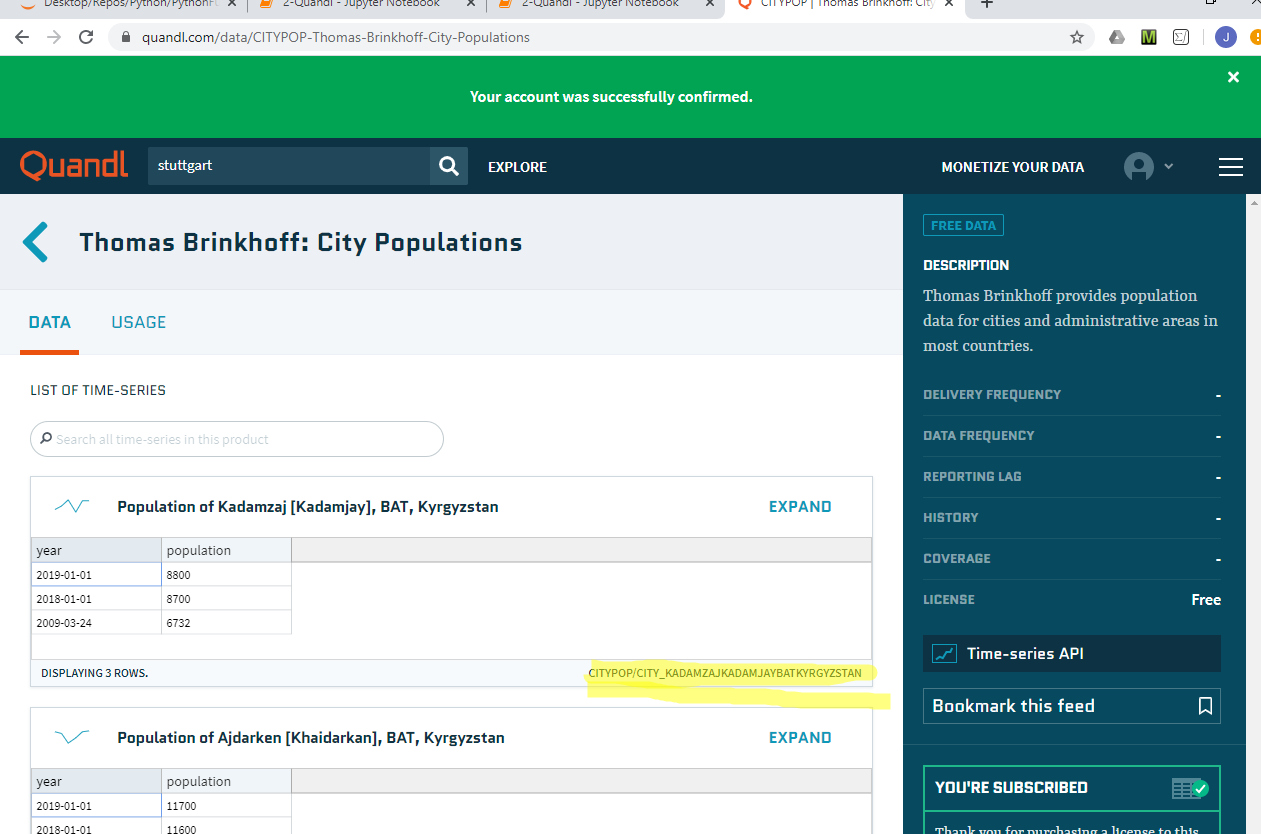
3. angenommen ich möchte eine bestimmte Börse, so muss ich zunächst in dem Webinterface die entsprechende Börse suchen, den code den ich dann verwende finde ich rechts unten:
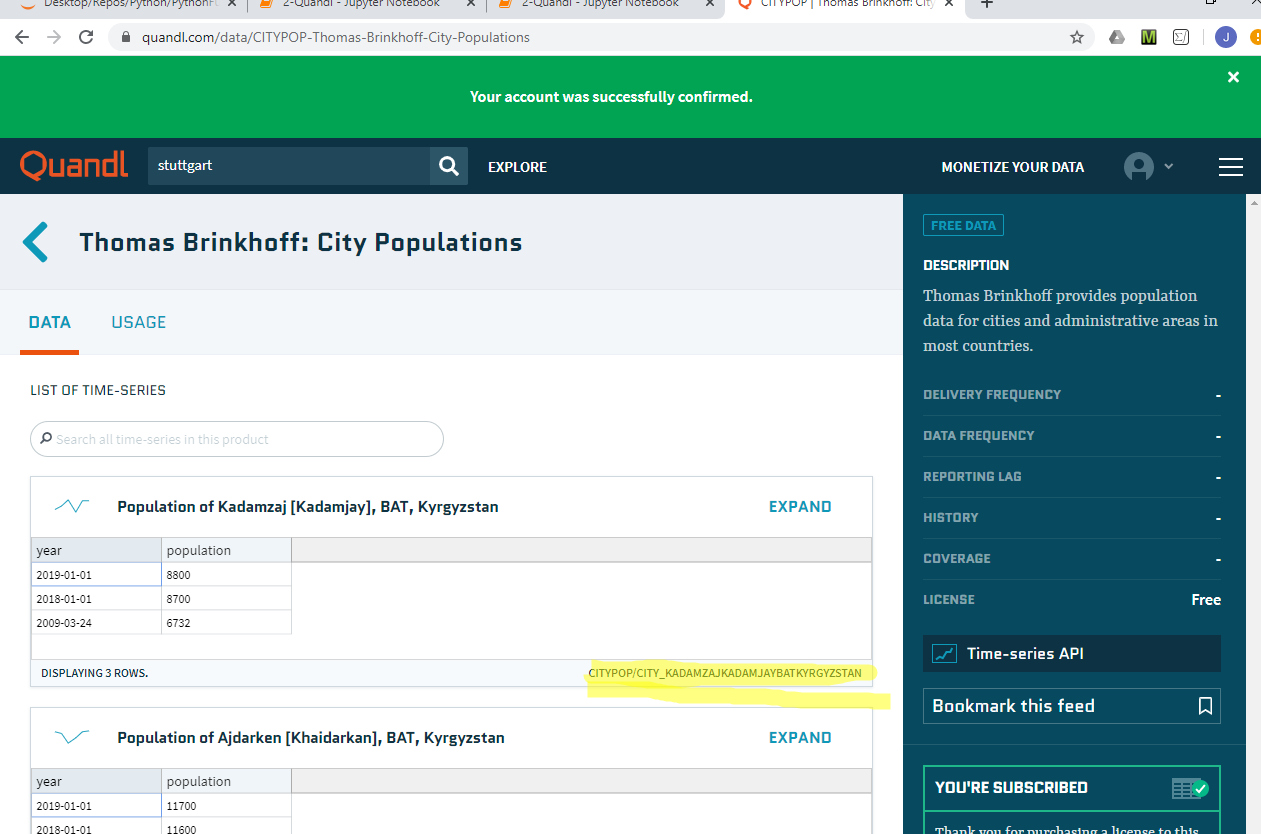


## Datenbank Codes

Jede Datenbank auf Quandl hat eine kurze Datenbank-ID (3-6 Zeichen), z.B.:

* CFTC Commitment of Traders Data: CFTC
* Core US Stock Fundamentals: SF1
* Federal Reserve Economic Data: FRED

Jede Datenbank enthält viele Datensätze. Datensätze haben ihre eigenen IDs, die an die ID ihrer zugehörigen Datenbank wie folgt angehängt werden:

* Commitment of traders for wheat:  CFTC/W_F_ALL
* Market capitalization for Apple:  SF1/AAPL_MARKETCAP
* US civilian unemployment rate:  FRED/UNRATE

Du kannst alle Datensatzcodes einer Datenbank mit einem einzigen API Aufruf runterladen, indem du /codes an deine Datenbank Anfrage anhängst. Der Aufruf liefert eine ZIP-Datei, die ein CSV enthält.

### Datenbanken


Jeder Quandl Code hat zwei Teile: den Datenbankcode ("WIKI"), der genau sagt, wo die Daten herkommen, und den Datensatzcode ("FB"), der die Zeitreihe markiert, die Du haben möchtest.

Du kannst Quandl Codes auf ihrer Website finden, indem Du ihren Datenbrowser verwendest.

https://www.quandl.com/search

In [ ]:
#!pip install quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
# bevor ich drauf zugreife muss ich erst den API-Key eingeben
quandl.ApiConfig.api_key = "nxKMpiuzMowi5uAUN12u"



In [ ]:
mydata = quandl.get("CITYPOP/CITY_KADAMZAJKADAMJAYBATKYRGYZSTAN")
print(type(mydata)) #<= pandas Core
print(mydata) #<= hierauf kann dann problem Die Visualisierung drauf gehen

In [ ]:
# Zeitliche Einschränkungen
mydata = quandl.get("FRED/GDP", start_date="2001-12-31", end_date="2005-12-31")
print(mydata)

In [ ]:
# Mehrere Abfragen
mydata = quandl.get(["NSE/OIL.1", "WIKI/AAPL.4"])
mydata

In [ ]:
## Abfragen über eine Liste
tech_list = ['AAPL','GOOGL','MSFT','AMZN']
for stock in tech_list:   
    # DataFrame als den Stock Ticker festlegen
    globals()[stock] = web.DataReader(stock,'stooq',start,end)

In [ ]:
print(AAPL.head())
print(GOOGL.head())
print(MSFT.head())
print(AMZN.head())

## Transform... 
### ...to Numpy

In [145]:
Numpyarr = df.to_numpy()
'''
print(type(carDF))
print(type(Numpyarr))
print(Numpyarr)
''' 

# hierbei gehen eben die Titel verolren => muss man sich wieder über die Column reinholen
backToPandas =  pd.DataFrame(Numpyarr)
#print(backToPandas)

### ....into a Dictionary
hier erhalte ich eine liste an dictionaries aus Columname & Value

In [148]:
backToPandas.to_dict(orient='records')

[{0: 0, 1: 1, 2: 2, 3: 3},
 {0: 4, 1: 5, 2: 6, 3: 7},
 {0: 8, 1: 9, 2: 10, 3: 11},
 {0: 12, 1: 13, 2: 14, 3: 15}]